### Hyperparameter Tuning (Simplified Explanation):

Imagine you’re baking a cake. You need to decide the right amount of sugar, flour, and baking time. If you use too much sugar, the cake might be too sweet. If you bake it for too long, it might burn. To get the perfect cake, you adjust these "settings" (ingredients and time) and try different combinations until it’s just right.

In machine learning, **hyperparameter tuning** is like adjusting the recipe to get the best performance for your model.

---

### **What are Hyperparameters?**
- Hyperparameters are the settings or configurations you define **before training** a model.
- They control how the model learns or predicts.
- Examples:
  - **In SVM:** Kernel type, \( C \), and gamma.
  - **In Random Forest:** Number of trees, maximum depth.
  - **In Neural Networks:** Learning rate, number of layers, batch size.

---

### **Why Tune Hyperparameters?**
1. **Improve Model Performance:**
   - Good hyperparameter values can lead to better accuracy, precision, or recall.
2. **Avoid Overfitting or Underfitting:**
   - Proper tuning balances the model’s ability to generalize on unseen data.
3. **Optimize Speed and Efficiency:**
   - Tuning can also reduce training time or memory usage.

---

### **How Hyperparameter Tuning Works:**
1. **Choose a Range of Values:**
   - Define possible values for each hyperparameter.
   - Example: For \( C \) in SVM, try \( [0.1, 1, 10] \).

2. **Train the Model for Each Combination:**
   - Train and evaluate the model using different combinations of hyperparameter values.

3. **Select the Best Combination:**
   - Choose the combination that gives the best performance on a validation set.

---

### **Methods for Hyperparameter Tuning:**

1. **Grid Search:**
   - Tries all possible combinations of hyperparameter values.
   - Example:
     - \( C = [0.1, 1, 10] \)
     - Gamma = [0.001, 0.01]
     - Tests all 6 combinations.

2. **Random Search:**
   - Randomly samples hyperparameter values.
   - Faster than Grid Search but may miss the optimal combination.

3. **Bayesian Optimization:**
   - Uses probabilistic models to find the best hyperparameters efficiently.

4. **Automated Tuning Tools:**
   - Libraries like Optuna, Hyperopt, or tools like AutoML automate the tuning process.

---

### **Real-World Example:**
You’re training a Random Forest model:
- Hyperparameters to tune:
  - Number of trees (\( n\_estimators \)): [10, 50, 100]
  - Maximum depth (\( max\_depth \)): [None, 10, 20]
- You try all combinations and find the best one gives 95% accuracy on the validation set.

---



## It helps you decide which model and kernals to use to get the perfect fit

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd


In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9777777777777777

Now here we have our normal method (train_test_split) but we can't relay on this method becasue the values changes each times it runs so the accuracy so we will use the k fold cross validation 
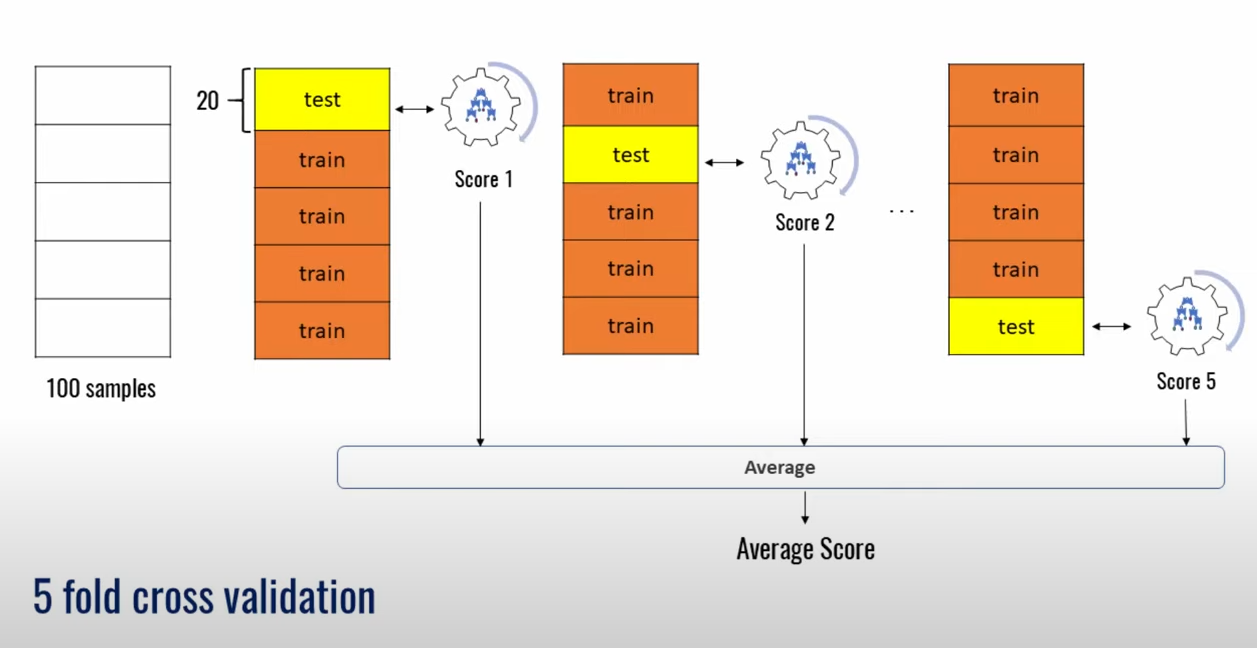

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(kernel='linear',C=10,gamma='auto'), iris.data, iris.target)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [9]:
cross_val_score(SVC(kernel='rbf',C=10,gamma='auto'), iris.data, iris.target)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [10]:
cross_val_score(SVC(kernel='rbf',C=20,gamma='auto'), iris.data, iris.target)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

But if you want to check this for soo many values you can use the for loop

In [11]:
import numpy as np

In [12]:
kernal = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernal:
    for cval in C:
        cv_scores = cross_val_score(SVC(kernel=kval,C=cval,gamma='auto'), iris.data, iris.target)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

In [13]:
avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

But this is not also the very good method becasue if i have more than 4 parameters i have to run 4 diffrenet for loops so to fix this we have an api in sklearn which is gridseachcv

In [16]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False) # cv is cross validation 

clf.fit(iris.data,iris.target)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [17]:
clf.cv_results_

{'mean_fit_time': array([0.00183201, 0.00318127, 0.00480042, 0.00200033, 0.00183954,
        0.00259738]),
 'std_fit_time': array([0.00071208, 0.0019501 , 0.00325216, 0.00126207, 0.00042357,
        0.00185587]),
 'mean_score_time': array([0.00121031, 0.00160422, 0.00263357, 0.00179753, 0.00220065,
        0.00126591]),
 'std_score_time': array([0.00040473, 0.00048612, 0.00052355, 0.00160094, 0.00040033,
        0.00044764]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],
 'split0_test_score': ar


--- 
But these results are not very fine to view so this can be imported into a dataframe

In [18]:
df = pd.DataFrame(clf.cv_results_)

In [19]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001832,0.000712,0.001210,0.000405,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.003181,0.001950,0.001604,0.000486,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.004800,0.003252,0.002634,0.000524,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.002000,0.001262,0.001798,0.001601,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001840,0.000424,0.002201,0.000400,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.002597,0.001856,0.001266,0.000448,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


### Not all of this is useful so we are trimming out the usefull part rank is not also usefull but i like to use it

In [20]:
df[['param_C','param_kernel','mean_test_score','rank_test_score']]

,param_C,param_kernel,mean_test_score,rank_test_score
0,1,rbf,0.980000,1
1,1,linear,0.980000,1
2,10,rbf,0.980000,1
3,10,linear,0.973333,4
4,20,rbf,0.966667,5
5,20,linear,0.966667,6


In [21]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_run_sea

In [23]:
clf.best_score_ # best score

0.9800000000000001

In [24]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

### But as of now we have limited data so it was fine

but if we have tons of data this process will cost a lot of computation power so to fix this we have diffrenet method which is randomizesearchCv
because it wont try each parameter it will use some random 

In [25]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False,n_iter=2) # n_iter is number of iterations

In [27]:
rs.fit(iris.data,iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score','rank_test_score']] # gives the result of the random search

,param_C,param_kernel,mean_test_score,rank_test_score
0,1,rbf,0.980000,1
1,20,linear,0.966667,2


Now we are done with how to choose hyperparameter tuning so lets start how to choose best model

In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
model_params = {
    'svm':{"model": SVC(gamma='auto'),'params':{"C":[1,10,20],"kernel":['rbf','linear']}},
    'random_forest':{'model':RandomForestClassifier(),'params':{"n_estimators":[1,5,10]}},
    'logistic_regression':{'model':LogisticRegression(solver='liblinear',multi_class='auto'),"params":{'C':[1,5,10]}}
}

In [32]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nabeel\AppData\Local\Programs\Pyth

In [33]:
scores

[{'model': 'svm',
  'best_score': 0.9800000000000001,
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': 0.9533333333333334,
  'best_params': {'n_estimators': 5}},
 {'model': 'logistic_regression',
  'best_score': 0.9666666666666668,
  'best_params': {'C': 5}}]

In [35]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


Now here we did both hyperparameter tuning and selected the best model which is svm